In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


In [5]:
from torchsummary import summary

model = torchvision.models.vgg19_bn(num_classes=10)
summary(model, (3, 32,32))

Layer (type:depth-idx)                   Output Shape              Param #
├─Sequential: 1-1                        [-1, 512, 1, 1]           --
|    └─Conv2d: 2-1                       [-1, 64, 32, 32]          1,792
|    └─BatchNorm2d: 2-2                  [-1, 64, 32, 32]          128
|    └─ReLU: 2-3                         [-1, 64, 32, 32]          --
|    └─Conv2d: 2-4                       [-1, 64, 32, 32]          36,928
|    └─BatchNorm2d: 2-5                  [-1, 64, 32, 32]          128
|    └─ReLU: 2-6                         [-1, 64, 32, 32]          --
|    └─MaxPool2d: 2-7                    [-1, 64, 16, 16]          --
|    └─Conv2d: 2-8                       [-1, 128, 16, 16]         73,856
|    └─BatchNorm2d: 2-9                  [-1, 128, 16, 16]         256
|    └─ReLU: 2-10                        [-1, 128, 16, 16]         --
|    └─Conv2d: 2-11                      [-1, 128, 16, 16]         147,584
|    └─BatchNorm2d: 2-12                 [-1, 128, 16, 16]        

Layer (type:depth-idx)                   Output Shape              Param #
├─Sequential: 1-1                        [-1, 512, 1, 1]           --
|    └─Conv2d: 2-1                       [-1, 64, 32, 32]          1,792
|    └─BatchNorm2d: 2-2                  [-1, 64, 32, 32]          128
|    └─ReLU: 2-3                         [-1, 64, 32, 32]          --
|    └─Conv2d: 2-4                       [-1, 64, 32, 32]          36,928
|    └─BatchNorm2d: 2-5                  [-1, 64, 32, 32]          128
|    └─ReLU: 2-6                         [-1, 64, 32, 32]          --
|    └─MaxPool2d: 2-7                    [-1, 64, 16, 16]          --
|    └─Conv2d: 2-8                       [-1, 128, 16, 16]         73,856
|    └─BatchNorm2d: 2-9                  [-1, 128, 16, 16]         256
|    └─ReLU: 2-10                        [-1, 128, 16, 16]         --
|    └─Conv2d: 2-11                      [-1, 128, 16, 16]         147,584
|    └─BatchNorm2d: 2-12                 [-1, 128, 16, 16]        

Files already downloaded and verified
Files already downloaded and verified
Epoch [1/50], Train Loss: 1.9437, Train Acc: 26.61%, Val Loss: 1.6541, Val Acc: 36.22%
Epoch [1/50], Train Loss: 1.9437, Train Acc: 26.61%, Val Loss: 1.6541, Val Acc: 36.22%
Epoch [2/50], Train Loss: 1.6029, Train Acc: 40.62%, Val Loss: 1.4528, Val Acc: 45.93%
Epoch [2/50], Train Loss: 1.6029, Train Acc: 40.62%, Val Loss: 1.4528, Val Acc: 45.93%
Epoch [3/50], Train Loss: 1.4226, Train Acc: 48.74%, Val Loss: 1.3879, Val Acc: 49.69%
Epoch [3/50], Train Loss: 1.4226, Train Acc: 48.74%, Val Loss: 1.3879, Val Acc: 49.69%
Epoch [4/50], Train Loss: 1.2723, Train Acc: 55.03%, Val Loss: 1.1828, Val Acc: 57.65%
Epoch [4/50], Train Loss: 1.2723, Train Acc: 55.03%, Val Loss: 1.1828, Val Acc: 57.65%
Epoch [5/50], Train Loss: 1.1753, Train Acc: 58.76%, Val Loss: 1.0928, Val Acc: 61.70%
Epoch [5/50], Train Loss: 1.1753, Train Acc: 58.76%, Val Loss: 1.0928, Val Acc: 61.70%
Epoch [6/50], Train Loss: 1.0878, Train Acc: 62.03%, V

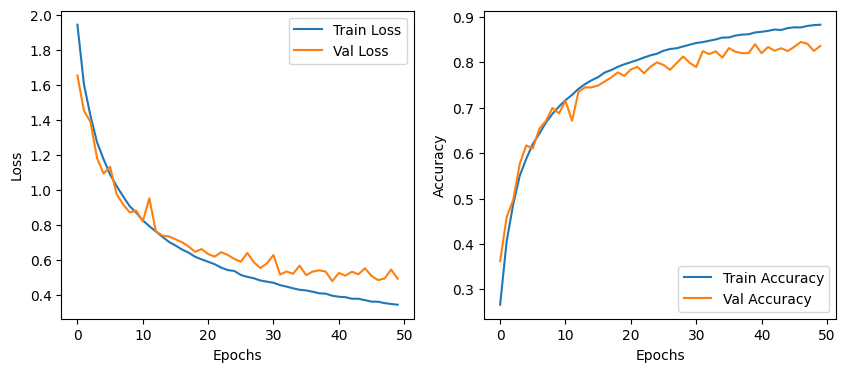

In [2]:
from PIL import Image
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchsummary import summary
import matplotlib.pyplot as plt
import numpy as np

transform_train = transforms.Compose(
    [   transforms.ToTensor(),
        transforms.RandomHorizontalFlip(p=0.6),
        transforms.RandomVerticalFlip(p=0.6),
        transforms.RandomRotation(30),
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ]
)
transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform_train)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=128, shuffle=True, num_workers=4)

valset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform_test)
valloader = torch.utils.data.DataLoader(valset, batch_size=100, shuffle=False, num_workers=4)

model = torchvision.models.vgg19_bn(num_classes=10)
model.classifier[6] = nn.Linear(4096, 10)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9, weight_decay=5e-4)

num_epochs = 50
train_losses, val_losses, train_acc, val_acc = [], [], [], []
best_val_acc = 0.0

for epoch in range(num_epochs):
    model.train()
    running_train_loss, correct_train, total_train = 0.0, 0, 0

    for i, (inputs, targets) in enumerate(trainloader):
        inputs, targets = inputs.to(device), targets.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()

        running_train_loss += loss.item()
        _, predicted = outputs.max(1)
        total_train += targets.size(0)
        correct_train += predicted.eq(targets).sum().item()

    train_losses.append(running_train_loss / (i + 1))
    train_acc.append(correct_train / total_train)

    model.eval()
    running_val_loss, correct_val, total_val = 0.0, 0, 0

    with torch.no_grad():
        for i, (inputs, targets) in enumerate(valloader):
            inputs, targets = inputs.to(device), targets.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, targets)

            running_val_loss += loss.item()
            _, predicted = outputs.max(1)
            total_val += targets.size(0)
            correct_val += predicted.eq(targets).sum().item()

    val_loss = running_val_loss / (i + 1)
    val_accuracy = correct_val / total_val
    val_losses.append(val_loss)
    val_acc.append(val_accuracy)

    print(f'Epoch [{epoch+1}/{num_epochs}], '
          f'Train Loss: {train_losses[-1]:.4f}, '
          f'Train Acc: {train_acc[-1]*100:.2f}%, '
          f'Val Loss: {val_loss:.4f}, '
          f'Val Acc: {val_accuracy*100:.2f}%')

    if val_accuracy > best_val_acc:
        best_val_acc = val_accuracy
        torch.save(model.state_dict(), 'best_model.pth')

    print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_losses[-1]:.4f}, Train Acc: {train_acc[-1]*100:.2f}%, Val Loss: {val_loss:.4f}, Val Acc: {val_accuracy*100:.2f}%')

plt.figure(figsize=(20, 4))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Val Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()


plt.subplot(1, 2, 2)
plt.plot(train_acc, label='Train Accuracy')
plt.plot(val_acc, label='Val Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()


plt.savefig('LossAndAccuracy.png')
plt.show()

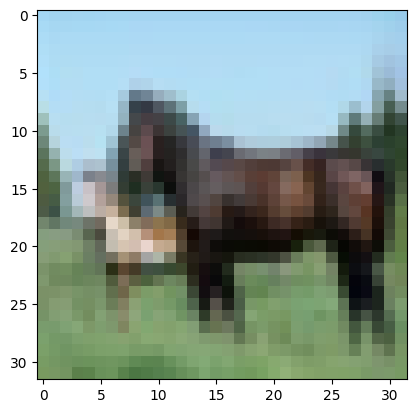

Predicted label: tensor([7]) horse


In [9]:
##################
## PREDICT TEST ##
##################
from PIL import Image
image_path = "Q5_image\Q5_1\\horse.png"
img = Image.open(image_path)
plt_image = plt.imshow(img)
plt.show(img)

myModel = torchvision.models.vgg19_bn(num_classes=10)
myModel.load_state_dict(torch.load("VGG19_BN_best.pth"))

myModel.eval()
preprocess = transforms.Compose([
            transforms.ToTensor(),
        ])

input_image = Image.open(image_path)
input_image = input_image

input_tensor = preprocess(input_image)
input_batch = input_tensor.unsqueeze(0) 

with torch.no_grad():
    output = myModel(input_batch)

with open('imagenet_labels.txt', 'r') as f:
    labels = f.readlines()

_, predicted_idx = torch.max(output, 1)
predicted_label = labels[predicted_idx.item()].strip()

print("Predicted label:", predicted_idx, predicted_label)



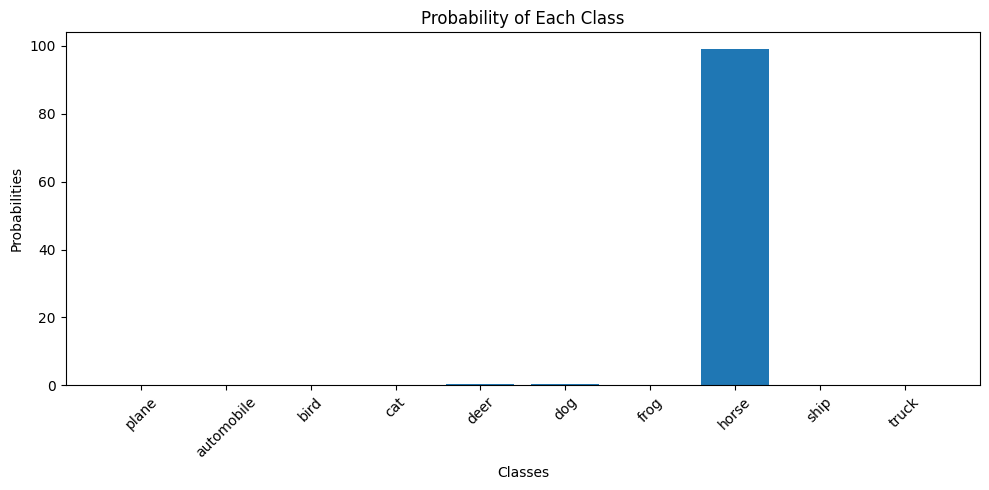

In [12]:
probabilities = torch.nn.functional.softmax(output, dim=1)[0] * 100
class_labels = ['plane', 'automobile', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10, 5))
plt.bar(class_labels, probabilities)
plt.xlabel('Classes')
plt.ylabel('Probabilities')
plt.title('Probability of Each Class')
plt.xticks(rotation=45)
plt.tight_layout()

# Display the plot in a new window
plt.show()

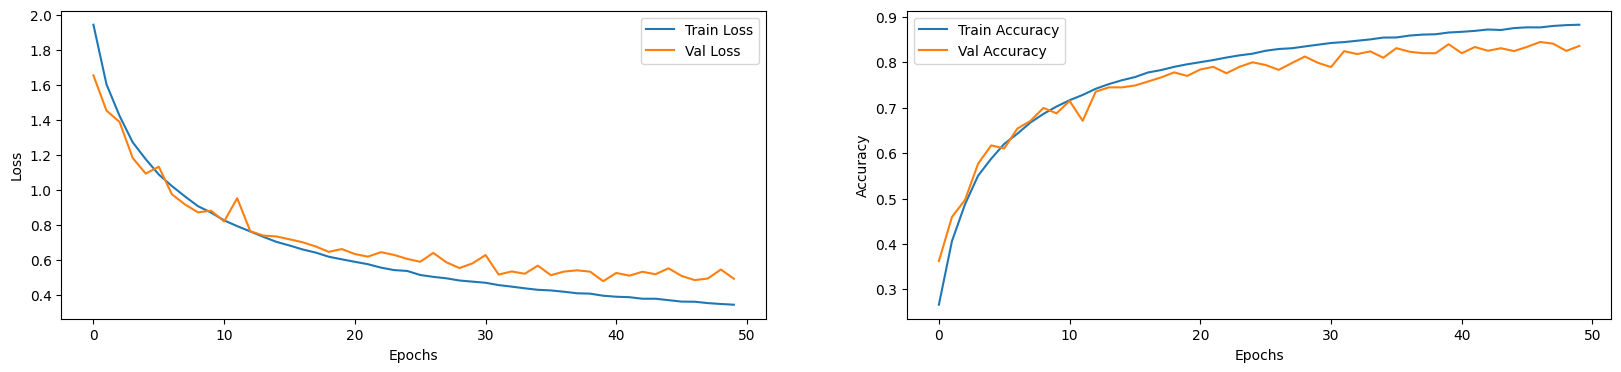

In [14]:
plt.figure(figsize=(20, 4))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Val Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()


plt.subplot(1, 2, 2)
plt.plot(train_acc, label='Train Accuracy')
plt.plot(val_acc, label='Val Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()


plt.savefig('LossAndAccuracy.png')
plt.show()